<a href="https://colab.research.google.com/github/liao771018/OpenCV/blob/main/OpenCV%E6%95%99%E5%AD%B83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

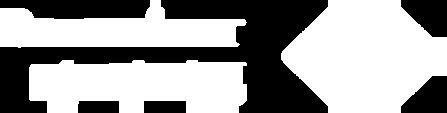

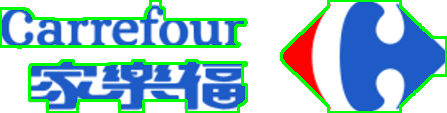

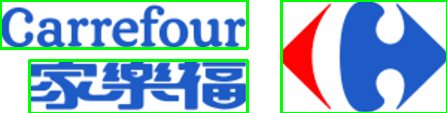

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# img1 = cv2.imread('test.jpg')
img1 = cv2.imread('1.png')
img2 = img1.copy()
img3 = img1.copy()
# 先轉灰階黑白圖，用 cv2.inRange 或 cv2.cvtColor轉 HSV
img1 = cv2.inRange(img1, (127,127,127), (255,255,255))

# 抓整個範圍用黑底最好 搭配侵蝕或膨脹
img1 = cv2.bitwise_not(img1)
# img1 = cv2.dilate(img1, np.ones((10,30)))
img1 = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, np.ones((13,30)))
cv2_imshow(img1)
# 依圖片不同也可以直接抓最外層的方框

# 輪廓點, 輪廓階層資料 = cv2.findContours(圖像變數, 類型, 方法) # 會從白色開始抓
contours, hierarchy = cv2.findContours(img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# print(len(conturs)) # 7
# print(conturs)
# print(hierarchy)

# 輪廓點是個多維陣列，第一維指向不同的輪廓，第二維指向該輪廓對應的所有輪廓點
# 輪廓階層是個多維陣列，用來記錄各個輪廓的關係，第二維指向各個輪廓，第三維會有四個值，紀錄輪廓的索引（如果為-1代表沒有）
# 分別代表： 1.相鄰的下一個輪廓
#       2.相鄰的上一個輪廓
#       3.被其包覆的第一個輪廓
#       4.包覆他的輪廓
# 類型 cv2.RETR_EXTERNAL ：只儲存最外層的輪廓
#    cv2.RETR_LIST ：儲存所有輪廓，但不建立階層資料
#    cv2.RETR_CCOMP ：儲存所有輪廓，但階層資料只包留兩層，首階層為物件外圍，第二階層為內部空心部分的輪廓，如果更內部有其餘物件，包含於首階層
#    cv2.RETR_TREE ：儲存所有輪廓與其對應的階層資料
# 方法 cv2.CHAIN_APPROX_NONE ：儲存所有輪廓點 
#    cv2.CHAIN_APPROX_SIMPLE ：簡化輪廓點，一條線只儲存頭尾


# 繪製輪廓
# cv2.drawContours(圖像變數, 存取全部輪廓的變數, 要繪製的輪廓索引, 顏色, 粗細)
cv2.drawContours(img2, contours, -1, (0,255,0), 2)


# 取得包覆指定輪廓點的最小正矩形：
# X座標 , Y座標 , 寬度 , 高度 = cv2.boundingRect(指定的輪廓)
x, y, w, h = cv2.boundingRect(contours[0])
cv2.rectangle(img3, (x,y), (x+w, y+h), (0,0,0), 2)


for i in range(len(contours)):
  x, y, w, h = cv2.boundingRect(contours[i])
  cv2.rectangle(img3, (x,y), (x+w, y+h), (0,255,0), 2)


cv2_imshow(img2)
cv2_imshow(img3)